# New Haven Housing Prices

## Imports and Data Sources

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#import numpy as np
import seaborn as sns
#import tensorflow as tf
#import matplotlib.dates as mdates

#from fredapi import Fred
#from datetime import timedelta
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, classification_report
#from sklearn.inspection import permutation_importance
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
#from sklearn.model_selection import train_test_split, GridSearchCV 

In [4]:
def load_dataframes(files):
    dataframes = []
    for file in files:
        df = pd.read_csv(file)
        dataframes.append(df)
    return dataframes

def clean_dataframe(df, columns=['RegionID', 'SizeRank', 'RegionType', 'StateName']):
    df = df.drop(columns=columns).T
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df.index.name = None
    df.index = pd.to_datetime(df.index)
    return df

def filter_columns(df, keyword):
    cols = df.columns[df.columns.str.contains(keyword)]
    return df[cols]

def process_dataframe(df, column_name, new_column_name, dfs_list):
    for column in df.columns:
        first_column = df.iloc[:,0]
        hartford_df['sold'] = df[first_column]

In [5]:
zillow_files = ['data/all_home_types_sold.csv', 'data/single_home_for_sale_listing.csv', 'data/single_home_value_index_by_nation.csv',
                'data/7_sold_above_listing.csv', 'data/8_median_sale_price.csv']
dataframes = load_dataframes(zillow_files)

In [6]:
homes_sold_df             = filter_columns(clean_dataframe(dataframes[0]), 'CT')
homes_listed_df           = filter_columns(clean_dataframe(dataframes[1]), 'CT')
homes_value_df            = filter_columns(clean_dataframe(dataframes[2]), 'CT')
homes_value_nation_df     = filter_columns(clean_dataframe(dataframes[2]), 'United States')
homes_sold_above_value_df = filter_columns(clean_dataframe(dataframes[3]), 'CT')
homes_median_price_df     = filter_columns(clean_dataframe(dataframes[4]), 'CT')

# DataFrame by County for Features

In [7]:
hartford_df   = pd.DataFrame()
bridgeport_df = pd.DataFrame()
new_haven_df  = pd.DataFrame()

In [8]:
hartford_df.index = homes_sold_df.index
bridgeport_df.index = homes_sold_df.index
new_haven_df.index = homes_sold_df.index

hartford_df['sold']   = homes_sold_df['Hartford, CT'].copy()
bridgeport_df['sold'] = homes_sold_df['Bridgeport, CT'].copy()
new_haven_df['sold']  = homes_sold_df['New Haven, CT'].copy()

In [9]:
hartford_df['listed']   = homes_listed_df['Hartford, CT'].copy()
bridgeport_df['listed'] = homes_listed_df['Bridgeport, CT'].copy()
new_haven_df['listed']  = homes_listed_df['New Haven, CT'].copy()

In [10]:
hartford_df['county_avg_value']   = homes_value_df['Hartford, CT'].copy()
bridgeport_df['county_avg_value'] = homes_value_df['Bridgeport, CT'].copy()
new_haven_df['county_avg_value']  = homes_value_df['New Haven, CT'].copy()

In [11]:
hartford_df['sold_above_value']   = homes_sold_above_value_df['Hartford, CT'].copy()
bridgeport_df['sold_above_value'] = homes_sold_above_value_df['Bridgeport, CT'].copy()
new_haven_df['sold_above_value']  = homes_sold_above_value_df['New Haven, CT'].copy()

In [12]:
hartford_df['median_price']   = homes_median_price_df['Hartford, CT'].copy()
bridgeport_df['median_price'] = homes_median_price_df['Bridgeport, CT'].copy()
new_haven_df['median_price']  = homes_median_price_df['New Haven, CT'].copy()

In [13]:
hartford_df['national_avg_value']   = homes_value_nation_df['United States'].copy()
bridgeport_df['national_avg_value'] = homes_value_nation_df['United States'].copy()
new_haven_df['national_avg_value']  = homes_value_nation_df['United States'].copy()

In [14]:
hartford_df = hartford_df.loc['2018':].ffill()
bridgeport_df = bridgeport_df.loc['2018':].ffill()
new_haven_df = new_haven_df.loc['2018':].ffill()

In [15]:
hartford_df.to_csv('data/9_hartford_ct_real_estate_metrics.csv', index=True)
bridgeport_df.to_csv('data/10_bridgeport_ct_real_estate_metrics.csv', index=True)
new_haven_df.to_csv('data/11_new_haven_ct_real_estate_metrics.csv', index=True)
homes_value_nation_df.to_csv('data/12_national_home_values.csv', index=True)

# DataFrame by Features for County

In [42]:
hs_df = dataframes[0].drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName']).T
hs_df.columns = hs_df.iloc[0]
hs_df.drop(hs_df.index[0], inplace=True)
hs_df.index.name = None

ct_cols = hs_df.columns[hs_df.columns.str.contains('CT')]
cols = []
cols.extend(ct_cols)
df_sold = hs_df[cols]
df_sold.index = pd.to_datetime(df_sold.index)

hl_df = dataframes[1].drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName']).T
hl_df.columns = hl_df.iloc[0]
hl_df.drop(hl_df.index[0], inplace=True)
hl_df.index.name = None

ct_cols = hl_df.columns[hl_df.columns.str.contains('CT')]
cols = []
cols.extend(ct_cols)
df_listed = hl_df[cols]
df_listed.index = pd.to_datetime(df_listed.index)

hv_df = dataframes[2].drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName']).T
hv_df.columns = hv_df.iloc[0]
hv_df.drop(hv_df.index[0], inplace=True)
hv_df.index.name = None

ct_cols = hv_df.columns[hv_df.columns.str.contains('CT')]
cols = []
cols.extend(ct_cols)
df_value = hv_df[cols]
df_value.index = pd.to_datetime(df_value.index)

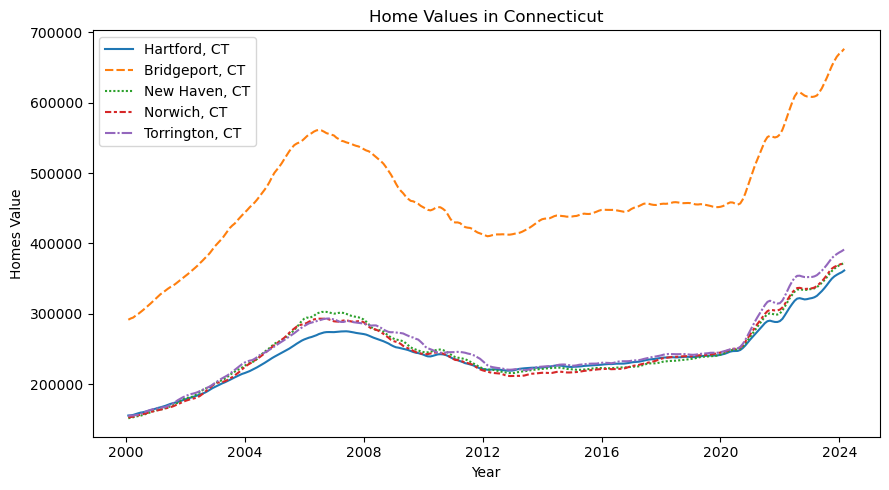

In [53]:
df = df_value
plt.figure(figsize=(9, 5))

sns.lineplot(data=df)

plt.title('Home Values in Connecticut')
plt.xlabel('Year')
plt.ylabel('Homes Value')

ax = plt.gca()
plt.tight_layout()
plt.legend()
plt.show()

In [54]:
df_value.to_csv('data/2_home_values_in_ct.csv', index=True)

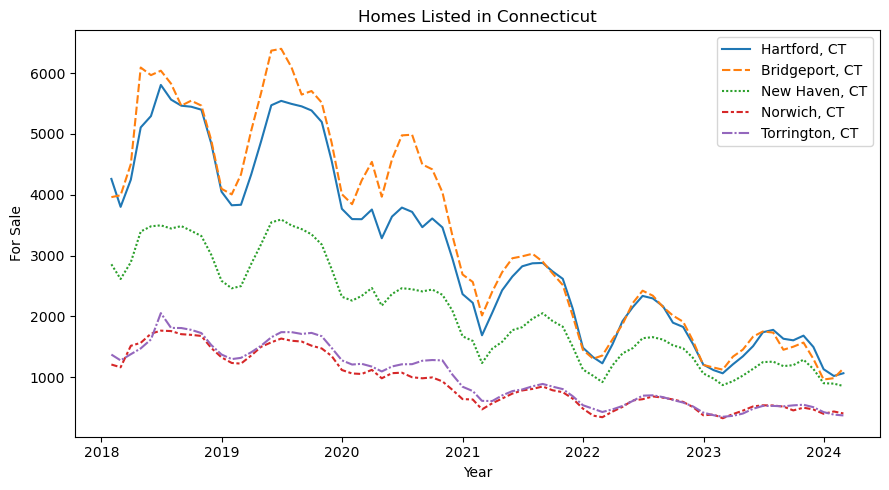

In [55]:
df = df_listed
plt.figure(figsize=(9, 5))

sns.lineplot(data=df)

plt.title('Homes Listed in Connecticut')
plt.xlabel('Year')
plt.ylabel('For Sale')

ax = plt.gca()
plt.tight_layout()
plt.legend()
plt.show()

In [56]:
df_listed.to_csv('data/3_home_listings_in_ct.csv', index=True)

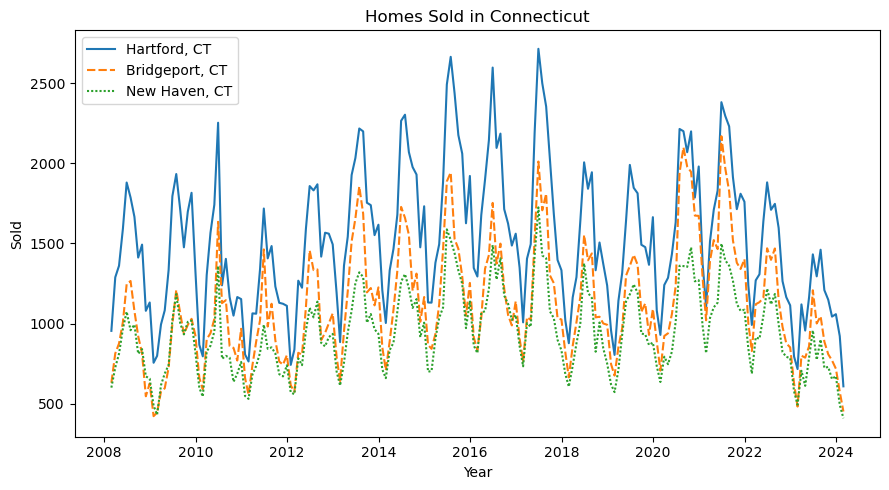

In [58]:
df = df_sold
plt.figure(figsize=(9, 5))
sns.lineplot(data=df)

plt.title('Homes Sold in Connecticut')
plt.xlabel('Year')
plt.ylabel('Sold')

ax = plt.gca()
plt.tight_layout()
plt.legend()
plt.show()

In [59]:
df_sold.to_csv('data/4_homes_sold_in_ct.csv', index=True)

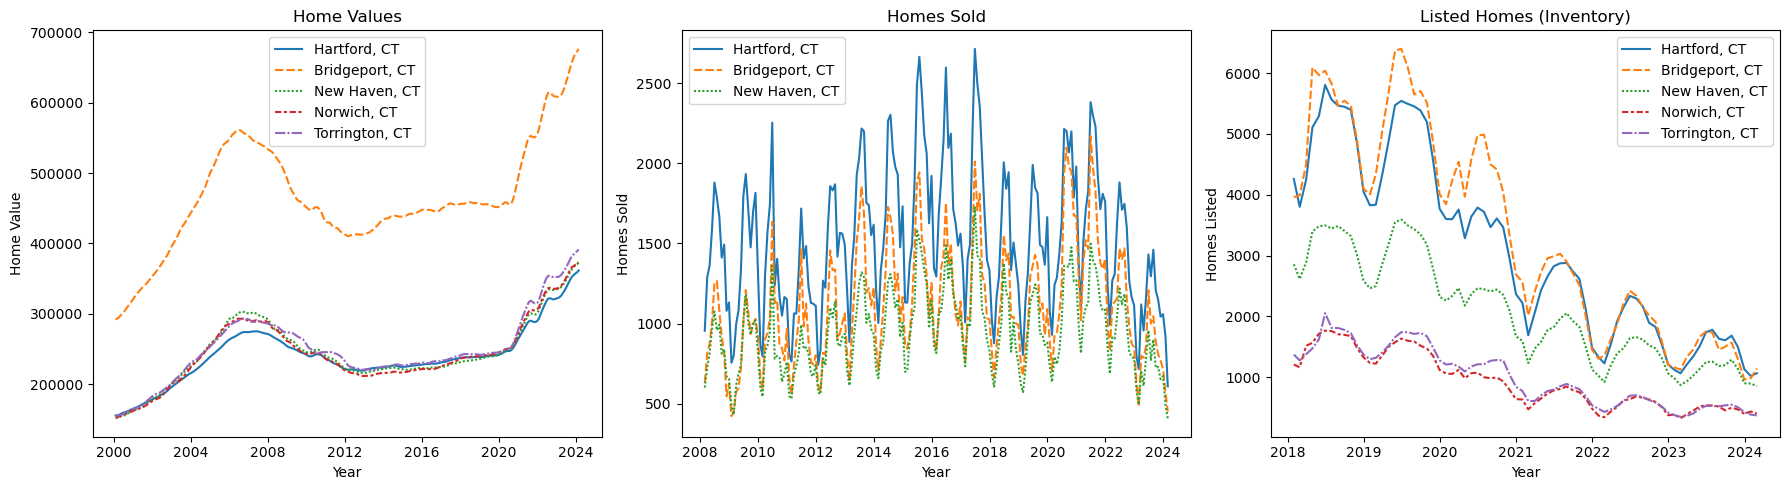

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5)) 

sns.lineplot(data=df_value, ax=axes[0])
axes[0].set_title('Home Values')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Home Value')
axes[0].legend().remove()
axes[0].legend()

sns.lineplot(data=df_sold, ax=axes[1])
axes[1].set_title('Homes Sold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Homes Sold')
axes[1].legend().remove()
axes[1].legend()

sns.lineplot(data=df_listed, ax=axes[2])
axes[2].set_title('Listed Homes (Inventory)')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Homes Listed')
axes[2].legend()

plt.tight_layout()
plt.show()